In [2]:
# Import libraries

import pandas as pd
import tensorflow as tf
from tensorflow import keras
pd.options.mode.chained_assignment = None
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 

# Read in the data

df = pd.read_csv(r'C:\Users\nicof\Downloads\movies.csv')

In [ ]:
!pip install seaborn --upgrade


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Let's look at the data 

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
# Let's see for missing data

for col in df.columns: 
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing)) 

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [ ]:
# Data type for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
df[['budget', 'gross']] = df[['budget','gross']].fillna(value=0)

In [ ]:
#Change data type

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [ ]:
# Create correct year column

datestr = []


for row in df['released']:
    
    datestr.append(str(row).split('(')[0][-5:])

df['correctyear'] = datestr

In [ ]:
df = df.sort_values(by=['gross'], inplace = False, ascending=False)

<Axes: >

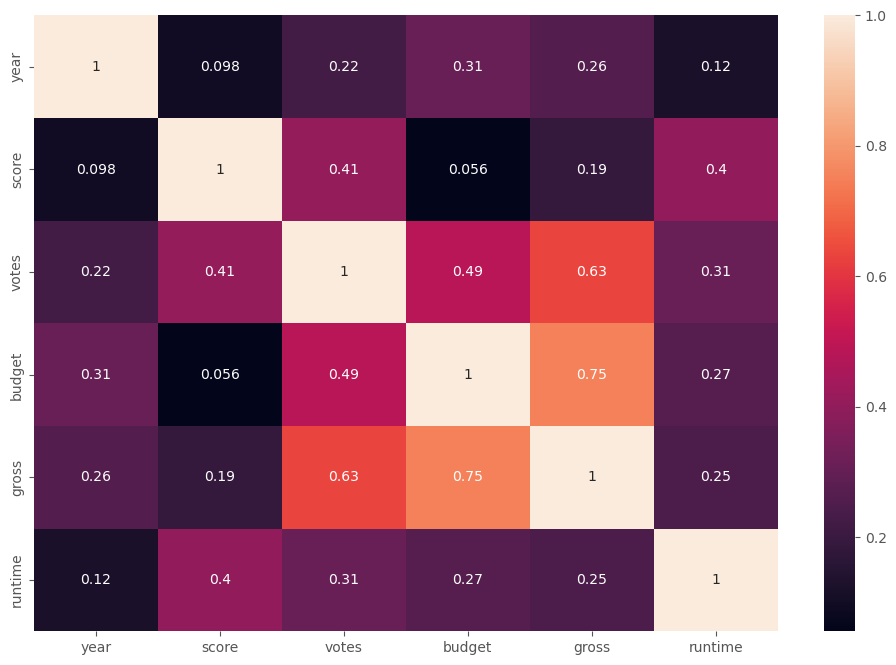

In [ ]:

sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='budget', ylabel='gross'>

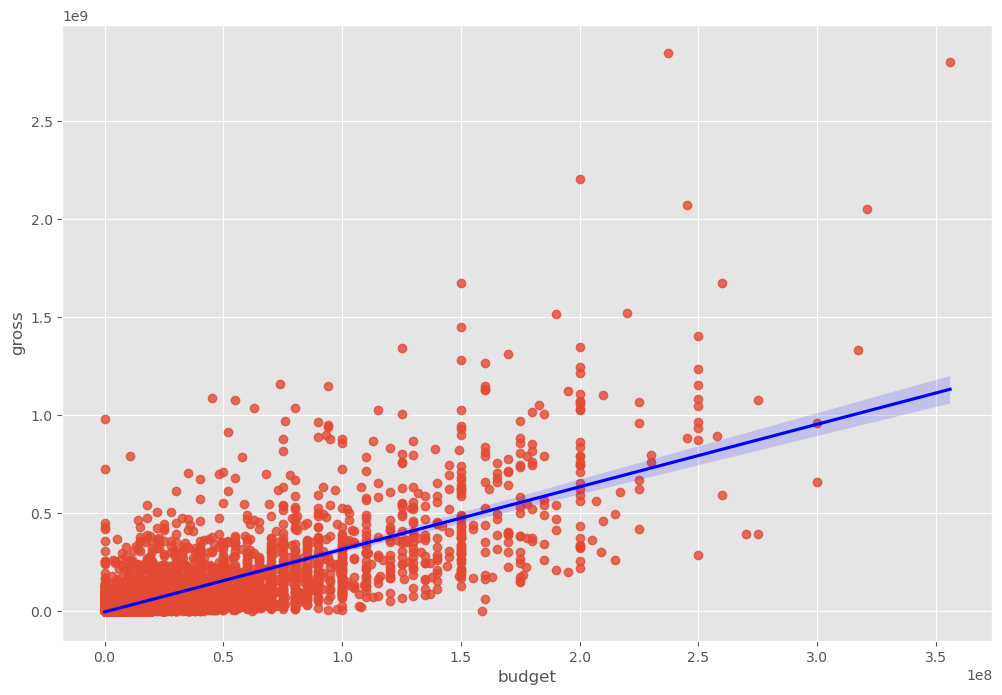

In [ ]:
# Variables correlation gross vs budget seaborn

sns.regplot(x='budget', y='gross', data=df, line_kws={'color':'blue'})

In [ ]:
# Numerize categorical variables 

df_numerized = df.copy() 

for col in df_numerized.columns:
    if (df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,6,5,1989,1277,4.5,274.0,117,82,2797,55,0,0,1159,92.0,10
1614,1745,6,10,1989,55,5.2,1300.0,1033,1743,166,54,0,0,146,85.0,9
1606,2691,6,8,1989,257,6.0,2900.0,2743,946,1195,6,0,0,2237,89.0,9
1601,3836,-1,4,1989,1160,7.1,1500.0,1105,1696,681,18,0,0,504,104.0,10


In [ ]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


<Axes: >

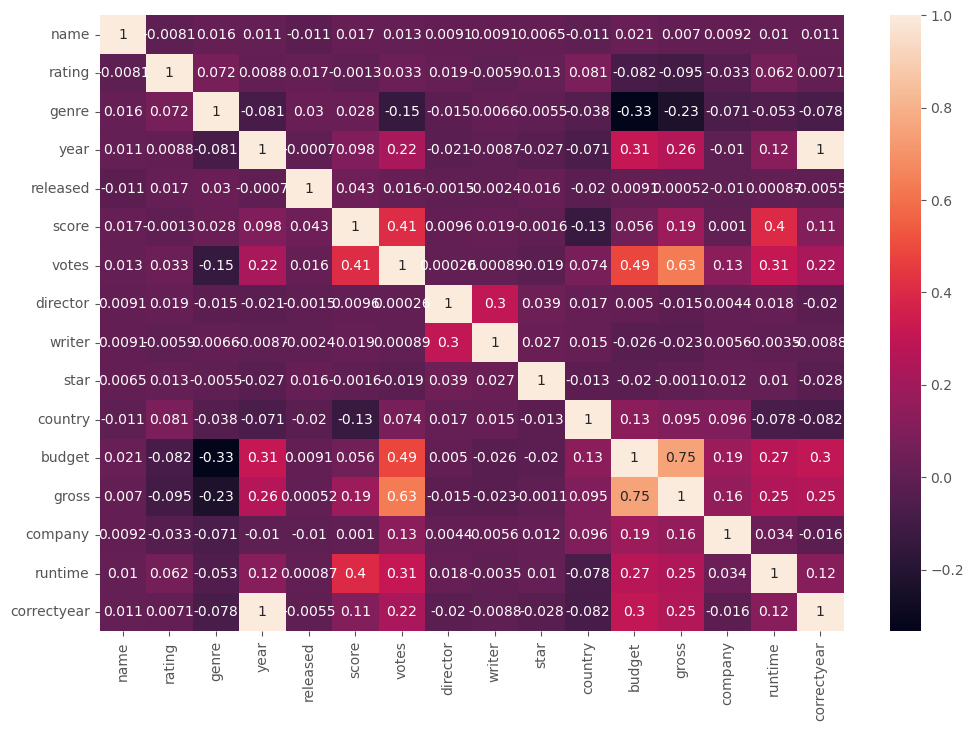

In [ ]:
#Correlation including categorical variables

sns.heatmap(df_numerized.corr(), annot=True)

<Axes: xlabel='votes', ylabel='gross'>

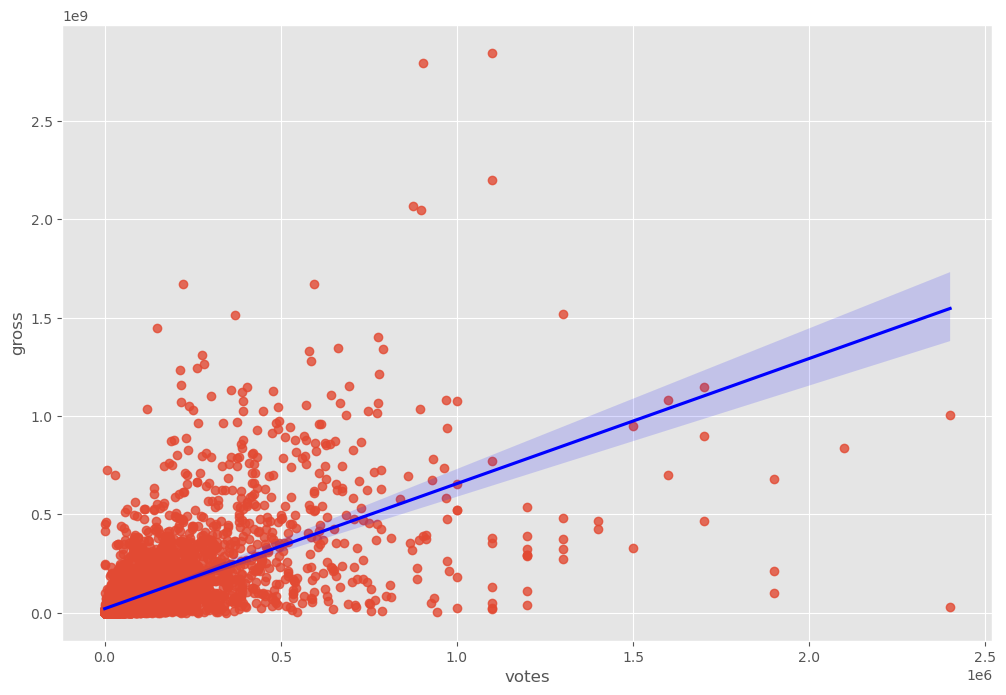

In [ ]:
sns.regplot(x='votes', y='gross', data=df, line_kws={'color':'blue'})